In [1]:
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

amode = MPI.MODE_WRONLY|MPI.MODE_CREATE
fh = MPI.File.Open(comm, "noncontiginious", amode)

item_count = 10

buffer = np.empty(item_count, dtype='i')
buffer[:] = rank

filetype = MPI.INT.Create_vector(item_count, 1, size)
filetype.Commit()

displacement = MPI.INT.Get_size()*rank
fh.Set_view(displacement, filetype=filetype)

fh.Write_all(buffer)
filetype.Free()
fh.Close()

In [50]:
item_count = 10

for i in range(4):

    buffer = np.empty(item_count, dtype='i')
    buffer[:] = i
    print(buffer)

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2]
[3 3 3 3 3 3 3 3 3 3]


In [51]:
len(buffer)

10

In [53]:
filetype = MPI.INT.Sub(item_count, 1, 4)

In [56]:
?MPI.INT.Create_vector

In [ ]:
fh.Re

In [61]:
nx, ny = 500 ,500

array = np.ones((nx,ny), dtype=np.int)

In [85]:
?MPI.FLOAT.Create_vector

In [65]:
MPI.DOUBLE.Create_vector?

In [66]:
MPI.DOUBLE.Get_size()

8

In [69]:
MPI.FLOAT.Get_size()*4

16

In [73]:
nx, ny, xL, yL, xR, yR, Imax  =500, 500, -2, -2, +2, +2, 1000

plane_coordinates = np.zeros(4, dtype='d') 
pixel_maxiter = np.zeros(3, dtype='i')

plane_coordinates[:] = [xL, xR, yL, yR]
pixel_maxiter[:] = [nx, ny, Imax]

In [87]:
MPI.DOUBLE.Get_size()

8

In [109]:
help(fh.Write_at)

Help on built-in function Write_at:

Write_at(...) method of mpi4py.MPI.File instance
    File.Write_at(self, Offset offset, buf, Status status=None)
    
    Write using explicit offset



In [110]:
help(fh.Write_at_all)

Help on built-in function Write_at_all:

Write_at_all(...) method of mpi4py.MPI.File instance
    File.Write_at_all(self, Offset offset, buf, Status status=None)
    
    Collective write using explicit offset



In [113]:
help(fh.Set_view)

Help on built-in function Set_view:

Set_view(...) method of mpi4py.MPI.File instance
    File.Set_view(self, Offset disp=0, Datatype etype=None, Datatype filetype=None, datarep=None, Info info=INFO_NULL)
    
    Set the file view



In [132]:
help(MPI.INT.Create_subarray)

Help on built-in function Create_subarray:

Create_subarray(...) method of mpi4py.MPI.Datatype instance
    Datatype.Create_subarray(self, sizes, subsizes, starts, int order=ORDER_C)
    
    Create a datatype for a subarray of
    a regular, multidimensional array



In [134]:
help(MPI.INT.Create_darray)

Help on built-in function Create_darray:

Create_darray(...) method of mpi4py.MPI.Datatype instance
    Datatype.Create_darray(self, int size, int rank, gsizes, distribs, dargs, psizes, int order=ORDER_C)
    
    Create a datatype representing an HPF-like
    distributed array on Cartesian process grids



In [127]:
array = np.ones((nx,ny), dtype=np.int)

In [128]:
array

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [131]:
array.shape[0]

500

In [ ]:
help(MPI.INT.)

In [138]:
dir(100)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [140]:
100.to_bytes()

SyntaxError: invalid syntax (<ipython-input-140-42d2c8fe0398>, line 1)

In [145]:
np.array([100],dtype=np.int).nbytes

8

In [146]:
np.array([500],dtype=np.int).nbytesarray = np.ones(nx*ny, dtype='i')

8

In [148]:
np.array([100,100,500]).nbytes

24

In [152]:
array = np.ones([nx,ny], dtype='i')

In [153]:
array

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [151]:
array.reshape()

(250000,)

In [157]:
np.float64(8)

8.0

Running MPI Mandelbrot with 1 cores
To assign paramters: mpirun -np 4 /home/john/anaconda3/envs/mpi_env/lib/python3.6/site-packages/ipykernel_launcher.py nx ny xL yL xR yR Imax 

Using default parameters nx = 500, ny = 500, xL = -2, yL = -2, xR = 2, yR = 2, Imax = 1000
wall clock time of processor 0 is:    20.28 seconds


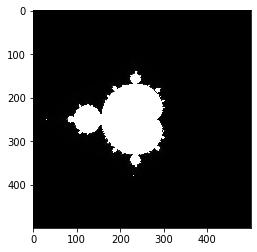

In [158]:
## MPI IO Part

# Broadcast the array that we are going to write with io
comm.Bcast([M, MPI.INT], root=0)

amode = MPI.MODE_WRONLY|MPI.MODE_CREATE
fh = MPI.File.Open(comm, "io_output", amode)

# Writing the coordinates

buffer_1= plane_coordinates

offset_1 = rank * plane_coordinates.nbytes // size

#print("plane_coordinates",plane_coordinates.nbytes)

#print("rank",rank,"offset_1",offset_1)

fh.Set_view(offset_1,etype=MPI.DOUBLE)

fh.Write_at_all(offset_1,buffer_1)

# Writing the pixels

buffer_2 = pixel_maxiter

offset_2 = plane_coordinates.nbytes + rank * pixel_maxiter.nbytes // size
#print("rank",rank,"offset_2",offset_2)

fh.Set_view(offset_2,etype=MPI.INT)

fh.Write_at_all(offset_2,buffer_2)

# Writing the matrix

buffer_3 = M

filetype = MPI.INT.Create_contiguous(M.shape[0])
filetype.Commit()

displacement = plane_coordinates.nbytes + pixel_maxiter.nbytes + rank * M.nbytes // size

#print("rank",rank,"offset_3",displacement)
fh.Set_view(disp = displacement, etype = MPI.INT, filetype = filetype)

fh.Write_at_all(displacement, buffer_3)

filetype.Free()
fh.Close()


In [159]:
nx

500

In [161]:
plane_coordinates = np.zeros(4, dtype='d') 
pixel_maxiter = np.zeros(3, dtype='i')
M = np.ones([500,500],dtype = 'i')

In [176]:
size = 7

In [177]:
plane_coordinates.nbytes, pixel_maxiter.nbytes, M.nbytes

(32, 12, 1000000)

In [178]:
for rank in range(size):
    print("offset1",rank * plane_coordinates.nbytes // size)
    print("offset2",plane_coordinates.nbytes + rank * pixel_maxiter.nbytes // size)
    print("offset3",plane_coordinates.nbytes + pixel_maxiter.nbytes + rank * M.nbytes // size)
    

offset1 0
offset2 32
offset3 44
offset1 4
offset2 33
offset3 142901
offset1 9
offset2 35
offset3 285758
offset1 13
offset2 37
offset3 428615
offset1 18
offset2 38
offset3 571472
offset1 22
offset2 40
offset3 714329
offset1 27
offset2 42
offset3 857186


In [179]:
for rank in range(size):
    print(rank * plane_coordinates.nbytes // size)
    print(plane_coordinates.nbytes + rank * pixel_maxiter.nbytes // size)
    print(plane_coordinates.nbytes + pixel_maxiter.nbytes + rank * array.nbytes // size)

0
32
44
4
33
142901
9
35
285758
13
37
428615
18
38
571472
22
40
714329
27
42
857186


In [2]:
help(MPI.INT.Create_contiguous)

Help on built-in function Create_contiguous:

Create_contiguous(...) method of mpi4py.MPI.Datatype instance
    Datatype.Create_contiguous(self, int count)
    
    Create a contiguous datatype



In [4]:
help(fh.Set_view)

Help on built-in function Set_view:

Set_view(...) method of mpi4py.MPI.File instance
    File.Set_view(self, Offset disp=0, Datatype etype=None, Datatype filetype=None, datarep=None, Info info=INFO_NULL)
    
    Set the file view



In [5]:
help(MPI.INT.Create_vector)

Help on built-in function Create_vector:

Create_vector(...) method of mpi4py.MPI.Datatype instance
    Datatype.Create_vector(self, int count, int blocklength, int stride)
    
    Create a vector (strided) datatype



In [8]:
help(fh.Write_all)

Help on built-in function Write_all:

Write_all(...) method of mpi4py.MPI.File instance
    File.Write_all(self, buf, Status status=None)
    
    Collective write using individual file pointer

